In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv('F:\\New folder\\airline_passenger_satisfaction.csv')
df

,Gender,Age,Customer_Type,Travel_Type,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [63]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [64]:
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df

,Gender,Age,Customer_Type,Travel_Type,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


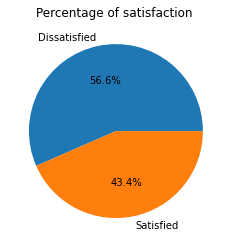

In [83]:
data = df.groupby(['Satisfaction'])['Satisfaction'].count().reset_index(name='Total_numbers')
Satisfaction= data.set_index('Satisfaction')

names =data['Satisfaction']
numbers= data['Total_numbers']
plt.pie(numbers, labels = names, autopct='%1.1f%%')
plt.title('Percentage of satisfaction ')
plt.show()

In [128]:
import plotly.express as px

data = df.groupby(['Gender','Satisfaction'])['Satisfaction'].count().reset_index(name='Total_numbers')

fig = px.bar(data, x="Gender", y="Total_numbers", color="Satisfaction", 
             title="Satisfaction level for each gender",text_auto=True)
fig.show()

In [129]:
data = df.groupby(['Customer_Type','Satisfaction'])['Satisfaction'].count().reset_index(name='Total_numbers')

fig = px.bar(data, x="Customer_Type", y="Total_numbers", color="Satisfaction", 
             title="Satisfaction level for each Customer Type",barmode='group' ,text_auto=True)
fig.show()

In [132]:
data = df.groupby(['Age','Satisfaction'])['Satisfaction'].count().reset_index(name='Total_numbers')

fig = px.histogram(data, x="Age", y="Total_numbers",
             color='Satisfaction', title= 'Satisfaction level for each Age',barmode='group',
             height=400)
fig.show()

In [133]:
data = df.groupby(['Travel_Type','Satisfaction'])['Satisfaction'].count().reset_index(name='Total_numbers')

fig = px.bar(data, x="Travel_Type", y="Total_numbers", color="Satisfaction", 
             title="Satisfaction level for each Travel Type",barmode='group' ,text_auto=True)
fig.show()

In [134]:
data = df.groupby(['Class','Satisfaction'])['Satisfaction'].count().reset_index(name='Total_numbers')

fig = px.bar(data, x="Class", y="Total_numbers", color="Satisfaction", 
             title="Satisfaction level for each Class",text_auto=True)
fig.show()

In [136]:
data = df.groupby(['Flight_Distance','Satisfaction'])['Satisfaction'].count().reset_index(name='Total_numbers')

fig = px.histogram(data, x="Flight_Distance", y="Total_numbers",
             color='Satisfaction', barmode='group',
             title= 'Satisfaction level for each flight distance',height=300)
fig.show()

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
z = df['Gender']
Z = le.fit_transform(z)
df['Gender'] = Z
df['Gender']

0         1
1         0
2         1
3         1
4         0
         ..
129875    1
129876    1
129877    1
129878    1
129879    0
Name: Gender, Length: 129880, dtype: int32

In [119]:
z = df['Customer_Type']
Z = le.fit_transform(z)
df['Customer_Type'] = Z
df['Customer_Type']

0         0
1         1
2         1
3         1
4         1
         ..
129875    1
129876    1
129877    1
129878    1
129879    1
Name: Customer_Type, Length: 129880, dtype: int64

In [120]:
z = df['Travel_Type']
Z = le.fit_transform(z)
df['Travel_Type'] = Z
df['Travel_Type']

0         0
1         0
2         0
3         0
4         0
         ..
129875    1
129876    1
129877    1
129878    1
129879    1
Name: Travel_Type, Length: 129880, dtype: int32

In [121]:
z = df['Class']
Z = le.fit_transform(z)
df['Class'] = Z
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
129875    2
129876    2
129877    2
129878    2
129879    2
Name: Class, Length: 129880, dtype: int32

In [122]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.20,random_state=42)
train_set

,Gender,Age,Customer_Type,Travel_Type,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling,Satisfaction
21413,0,37,1,0,0,2185,18,13.0,2,2,...,4,2,4,3,5,4,2,4,4,Satisfied
7284,1,10,1,1,1,135,489,491.0,4,0,...,3,4,4,4,0,5,3,4,5,Dissatisfied
86080,1,21,0,0,1,306,1,0.0,0,4,...,3,4,4,4,4,5,4,4,4,Satisfied
59842,1,54,1,0,0,3000,16,4.0,2,2,...,5,4,5,3,2,5,2,5,5,Satisfied
69486,1,22,1,0,2,944,11,10.0,4,4,...,2,2,2,1,1,4,1,1,4,Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128106,0,53,1,0,0,1587,2,0.0,1,1,...,5,5,5,5,4,5,1,5,5,Satisfied
103694,0,27,1,0,0,3095,182,388.0,4,2,...,2,5,3,5,5,3,4,3,4,Satisfied
860,1,20,0,0,1,113,0,0.0,0,2,...,5,2,5,4,4,5,2,4,4,Dissatisfied
15795,0,36,0,0,1,143,40,30.0,4,3,...,3,4,3,4,4,3,3,4,5,Dissatisfied


In [123]:
air_train=train_set.drop('Satisfaction', axis=1)  
train_lable = train_set["Satisfaction"].copy()
air_train = air_train
air_train

,Gender,Age,Customer_Type,Travel_Type,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,Gate_Location,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling
21413,0,37,1,0,0,2185,18,13.0,2,2,...,2,4,2,4,3,5,4,2,4,4
7284,1,10,1,1,1,135,489,491.0,4,0,...,4,3,4,4,4,0,5,3,4,5
86080,1,21,0,0,1,306,1,0.0,0,4,...,5,3,4,4,4,4,5,4,4,4
59842,1,54,1,0,0,3000,16,4.0,2,2,...,2,5,4,5,3,2,5,2,5,5
69486,1,22,1,0,2,944,11,10.0,4,4,...,4,2,2,2,1,1,4,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128106,0,53,1,0,0,1587,2,0.0,1,1,...,1,5,5,5,5,4,5,1,5,5
103694,0,27,1,0,0,3095,182,388.0,4,2,...,4,2,5,3,5,5,3,4,3,4
860,1,20,0,0,1,113,0,0.0,0,2,...,1,5,2,5,4,4,5,2,4,4
15795,0,36,0,0,1,143,40,30.0,4,3,...,1,3,4,3,4,4,3,3,4,5


In [124]:
air_test=test_set.drop('Satisfaction', axis=1)  
test_lable = test_set["Satisfaction"].copy()
air_test = air_test
air_test

,Gender,Age,Customer_Type,Travel_Type,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,Gate_Location,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling
103044,1,23,0,0,1,546,0,0.0,4,3,...,3,3,2,1,2,2,3,3,2,4
43282,1,38,1,0,1,531,0,0.0,1,1,...,1,2,5,2,5,5,3,5,5,1
65543,1,33,1,0,0,237,0,3.0,3,3,...,3,3,4,4,4,4,5,3,4,4
65083,1,68,1,1,1,224,0,0.0,3,4,...,2,2,1,2,1,1,5,4,1,3
76496,1,27,0,0,0,516,7,0.0,5,5,...,1,4,1,3,4,4,5,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121239,0,34,1,0,0,2075,80,81.0,1,1,...,1,2,4,2,2,1,2,2,2,2
6010,1,22,0,0,1,630,0,46.0,3,1,...,3,4,1,1,1,1,2,1,1,2
101127,0,60,1,0,0,3639,6,0.0,2,2,...,2,4,5,4,5,2,4,2,4,4
82323,0,38,1,0,0,2005,38,80.0,3,3,...,3,2,4,2,4,3,2,2,2,2


In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
  
# create logistic regression object
reg = LogisticRegression()
  
# train the model using the training sets
reg.fit(air_train, train_lable)
 
# making predictions on the testing set
y_pred = reg.predict(air_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(test_lable, y_pred)*100)


Logistic Regression model accuracy(in %): 81.20187865722205


C:\Users\yasse\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(air_train, train_lable)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])

pipe.score(air_test,test_lable) 

0.8743840468124423

In [127]:
data = pd.read_excel('F:\\New folder\\Passenger_data.xlsx')
perdication = pipe.predict(data)
perdication

array(['Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Dissatisfied',
       'Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Dissatisfied',
       'Dissatisfied', 'Dissatisfied', 'Satisfied', 'Satisfied',
       'Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Dissatisfied',
       'Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Dissatisfied',
       'Dissatisfied', 'Dissatisfied', 'Dissatisfied', 'Dissatisfied'],
      dtype=object)